In [3]:
#Import all necessary libraries
import tensorflow as tf 
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np


In [5]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


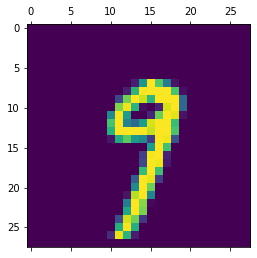

In [14]:
plt.matshow(X_train[133])

In [15]:
y_train[133]

9

In [27]:
#Currently, the X_train has 6000 images which is each 28 * 28 2-D arrays
X_train.shape

#Now, we are scaling down data to make sure values are between 0 - 1
X_train = X_train / 255
X_test = X_test / 255


In [28]:
#We need to reshape it to contain 6000 images with 784 data point. We do this using Pandas reshape function
X_train_flatten = X_train.reshape(len(X_train),28*28)
X_test_flatten = X_test.reshape(len(X_test), 28*28)
#X_train_flatten.shape

In [29]:
model = keras.Sequential([
         keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train_flatten,y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4695 - accuracy: 0.8785
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3044 - accuracy: 0.9137
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2834 - accuracy: 0.9208
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2729 - accuracy: 0.9240
Epoch 5/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2666 - accuracy: 0.9257


In [30]:
model.evaluate(X_test_flatten,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.2661 - accuracy: 0.9256


[0.2660598158836365, 0.925599992275238]

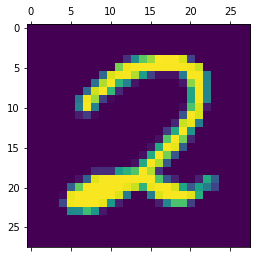

In [37]:
plt.matshow(X_test[35])

In [32]:
y_predicted = model.predict(X_test_flatten)
y_predicted[0]

array([1.3387769e-02, 2.5231421e-07, 5.6473613e-02, 9.5539129e-01,
       1.7790496e-03, 7.9205662e-02, 1.1961870e-06, 9.9976730e-01,
       1.1411515e-01, 5.8971792e-01], dtype=float32)

In [38]:
np.argmax(y_predicted[35])

2

In [41]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

Text(69.0, 0.5, 'Truth')

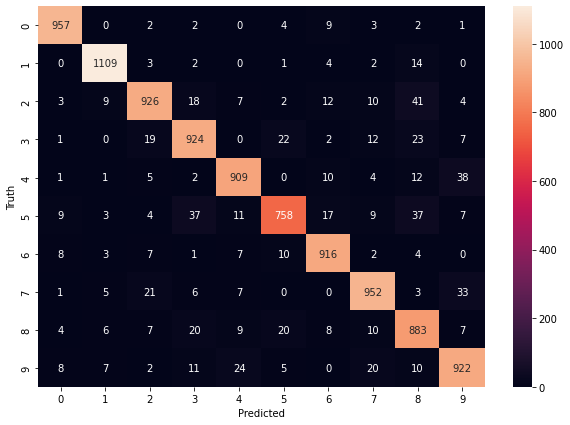

In [43]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)

import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [47]:
#Creating our neural network with 784 input layers,
#150 hidden layer nodes
#finally 10 output layer nodes
model = keras.Sequential([
    keras.layers.Dense(150, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flatten, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2465 - accuracy: 0.9292
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1082 - accuracy: 0.9683
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0738 - accuracy: 0.9776
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0548 - accuracy: 0.9833
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0420 - accuracy: 0.9871


In [48]:
model.evaluate(X_test_flatten,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0733 - accuracy: 0.9789


[0.0733431726694107, 0.9789000153541565]